In [1]:
from BeautifulSoup import BeautifulSoup
import re, os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
directory_dir = "../html/change.detail/"

In [3]:
data = []
for file_name in os.listdir(directory_dir):
    html_text = open(directory_dir + file_name).read().replace('\n', '').replace('\r', '')
    try:
        category = re.findall('var rootCategoryName="([^"]*)', html_text)[0].decode('unicode_escape')
        subcategory = re.findall('var categoryName="([^"]*)', html_text)[0].decode('unicode_escape')
        region = re.findall('var regionName="([^"]*)', html_text)[0].decode('unicode_escape')
        subregion = re.findall('var subregionName="([^"]*)', html_text)[0].decode('unicode_escape')
        title = re.findall('var ad_title=\'([^\']*)', html_text)[0]
        description = re.findall('<div class="clr" id="textContent">[ ]*<p class="pding10 lheight20 large">([^<]*)', html_text)[0].strip()

    except:
        continue
    
    data.append((title, region, subregion, category, subcategory, description))

In [6]:
df = pd.DataFrame(data, columns=["title", "city", "region", "category", "subcategory", "description"])
df.to_csv("change.detail.csv", index=False, encoding="utf-8")

In [9]:
descriptions = list(df['description'])

In [69]:
out = open('out.txt', 'w')
out.write("\n".join(descriptions))
out.close()

In [125]:
def normalize(text):
    text = text.lower()
    text = ", ".join(text.split(','))
    text = text.replace('  ', ' ')
    return text

def find_patterns(text):
    patterns = []
    #patterns.extend(re.findall("(zamienie(?: [^ ]*){,5} na)((?: [^,. ]*){1,5})", text))
    patterns.extend(re.findall("([ ]*[^ ]*mieni[^ ]*(?: [^ ]*){,5} na)((?: [^,. ]*){1,6})", text))
    patterns.extend(re.findall("([ ]*[^ ]*amian[^ ]*(?: [^ ]*){,5} za)((?: [^,. ]*){1,6})", text))
    patterns.extend(re.findall("([ ]*[^ ]*ania[^ ]*(?: [^ ]*){,5} za)((?: [^,. ]*){1,6})", text))
    patterns.extend(re.findall("([ ]*[^ ]*ania[^ ]*(?: [^ ]*){,5} na)((?: [^,. ]*){1,6})", text))
    patterns.extend(re.findall("([ ]*[^ ]*zamian przyjme[^ ]*(?: [^ ]*){,5} na)((?: [^,. ]*){1,6})", text))
    return patterns
    

text_data = []

for desc in list(set(descriptions)):
    patterns = find_patterns(normalize(desc))
    if patterns:
        text_data.append((desc, patterns[0][0].strip(), patterns[0][1].strip()))

In [126]:
text_df = pd.DataFrame(text_data)
text_df.count()

0    3292
1    3292
2    3292
dtype: int64

In [137]:
top_counts = []
from collections import Counter
for text, count in Counter(text_df[2]).most_common(50):
    top_counts.append((text.strip().decode('utf-8'), count))

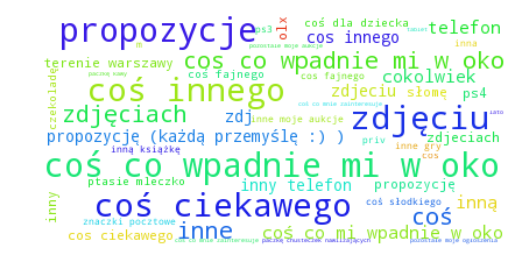

In [138]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white").generate_from_frequencies(top_counts)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
